In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn;

In [5]:
data = pd.read_csv('/kaggle/input/cuisinescsv2/cuisines.csv')

In [7]:
data.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
data.describe()

,Unnamed: 0,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.0,2448.000000,...,2448.0,2448.000000,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.000000
mean,16040.551471,0.018382,0.0,0.000408,0.002859,0.013889,0.0,0.005310,0.0,0.002451,...,0.0,0.000817,0.020833,0.004085,0.067810,0.0,0.001634,0.015523,0.059232,0.008578
std,13625.719887,0.134357,0.0,0.020211,0.053408,0.117054,0.0,0.072694,0.0,0.049457,...,0.0,0.028577,0.142855,0.063796,0.251472,0.0,0.040398,0.123645,0.236107,0.092241
min,65.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10907.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,15263.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,16926.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,57690.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [11]:
data.size

942480

In [12]:
data.shape

(2448, 385)

In [24]:
data.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

<Axes: xlabel='cuisine'>

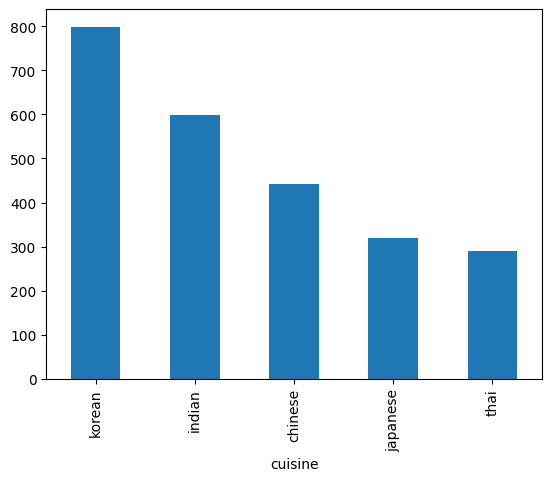

In [27]:
data['cuisine'].value_counts().plot(kind = 'bar') 

In [29]:
data.drop(columns = ['Unnamed: 0'] , inplace = True)

In [30]:
X = data.drop(columns  =['cuisine'] )
y = data['cuisine']

In [44]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

Scaled_X = scaler.fit_transform(X);

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.2)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

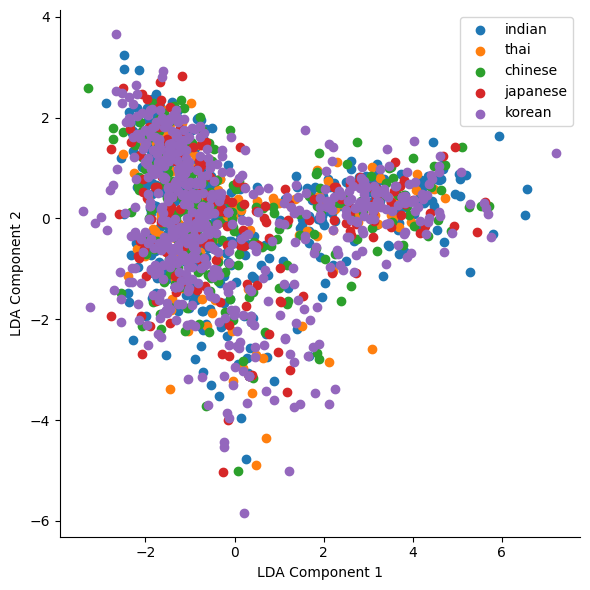

In [47]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

# HOW PCA LOOKS ? 

In [71]:
features = data.columns

features

features_actual = []
target =[]

for fea in features : 
    if fea == 'cuisine':
        target.append(fea)
    else:
        features_actual.append(fea)

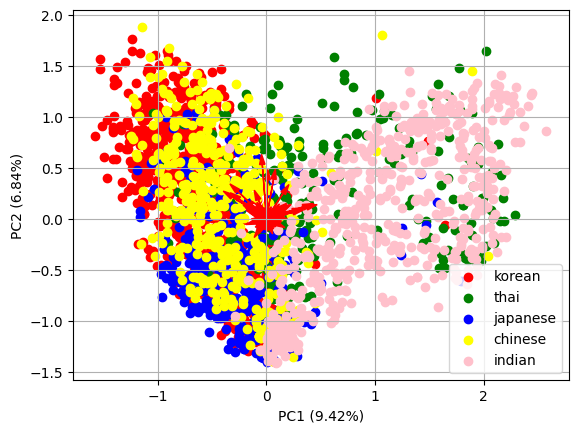

In [74]:
X = data[features_actual].values
y = data['cuisine'].values


pca = PCA(n_components=2)
scores = pca.fit_transform(X)
coeff = pca.components_.T
explained_variance = pca.explained_variance_ratio_

def biplot(score, coeff, labels, target_names):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    colors = ['red', 'green', 'blue', 'yellow','pink']  
    
    for i, target_name in enumerate(target_names):
        xi = [score[j, 0] for j in range(score.shape[0]) if y[j] == target_name]
        yi = [score[j, 1] for j in range(score.shape[0]) if y[j] == target_name]
        plt.scatter(xi, yi, c=colors[i % len(colors)], label=target_name)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', head_width=0.05, head_length=0.1)
#         plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel('PC1 ({:.2f}%)'.format(explained_variance[0] * 100))
    plt.ylabel('PC2 ({:.2f}%)'.format(explained_variance[1] * 100))
    plt.grid()
    plt.legend()
    plt.show()

unique_targets = list(set(y))

biplot(scores, coeff, features_actual, unique_targets)